# Breast Cancer Prediction
Last Updated: January 15th, 2024

Daily Challenge: Breast Cancer Prediction


What you will learn
Data visualization with scatter plots.
Basic understanding of classification models
Interpreting the results.


What you will create
In this notebook, you will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).
dataset available here



Your Task
Exploratory Data Analysis
Use pandas to load the dataset and examine the first few rows.
Check and handle the missing values.
Drop any unnecessary column
Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
counts of unique rows in the ‘diagnosis’ column
map categorical values to numerical values
Splitting the data into train and test
Implement logistic regression and print the accuracy.
Implement K Nearest Neighbours and print the accuracy.
Implement Random Forests and print the accuracy.
Implement Support Vector Machines (SVM) and print the accuracy.
Which is the best model ?


 1. Chargement des données et EDA

In [2]:
pip install pandas seaborn matplotlib scikit-learn


     --------------------------------------- 11.1/11.1 MB 93.8 MB/s eta 0:00:00
     ---------------------------------------- 294.9/294.9 kB ? eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 171.2 MB/s eta 0:00:00
     -------------------------------------- 10.7/10.7 MB 164.9 MB/s eta 0:00:00
     ---------------------------------------- 347.8/347.8 kB ? eta 0:00:00
     ---------------------------------------- 509.2/509.2 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 149.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 148.4 MB/s eta 0:00:00
     ---------------------------------------- 111.1/111.1 kB ? eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? eta 0:00:00
     ---------------------------------------- 221.2/221.2 kB ? eta 0:00:00
     -------------------------------------- 41.3/41.3 MB 108.7 MB/s eta 0:00:00
     ------------------------------------- 307.7/307.7 kB 19.8 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

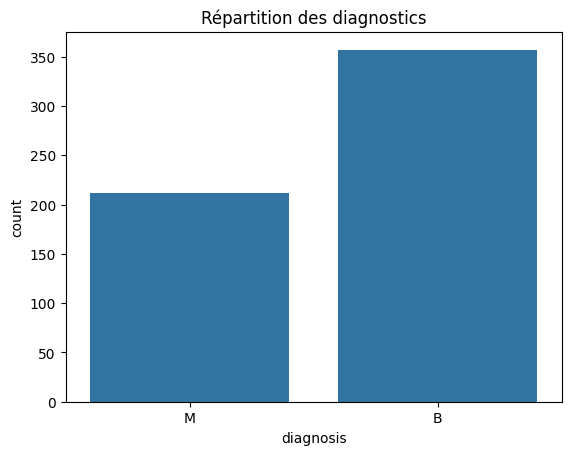

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('data_breast_cancer.csv')
print(df.head())

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les colonnes inutiles (ex : 'id' ou 'Unnamed: 32' s'il existe)
df.drop(columns=['id'], inplace=True, errors='ignore')
df.drop(columns=['Unnamed: 32'], inplace=True, errors='ignore')

# Afficher un Countplot du diagnostic
sns.countplot(x='diagnosis', data=df)
plt.title("Répartition des diagnostics")
plt.show()


In [ ]:
Nettoyage

In [5]:
# Supprimer les colonnes uniquement si elles existent
df.drop(columns=[col for col in ['id', 'Unnamed: 32'] if col in df.columns], inplace=True)


Prétraitement + Modélisation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Mapper la colonne 'diagnosis' en numérique
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Séparer les features et la cible
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Entraînement des modèles + évaluation

In [9]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Résultats
print("Logistic Regression Accuracy:", lr_acc)
print("KNN Accuracy:", knn_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

# Meilleur modèle
accs = {
    "Logistic Regression": lr_acc,
    "KNN": knn_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc
}
best_model = max(accs, key=accs.get)
print("✅ Meilleur modèle :", best_model, "avec une précision de", accs[best_model])


Logistic Regression Accuracy: 0.9736842105263158
KNN Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
SVM Accuracy: 0.9736842105263158
✅ Meilleur modèle : Logistic Regression avec une précision de 0.9736842105263158


Le code fonctionne bien et les résultats sont cohérents.

### Résumé :

* **Logistic Regression** : **97.36 %** → 🔥 meilleur (à égalité avec SVM)
* **SVM** : **97.36 %** → aussi très performant
* **Random Forest** : **96.49 %**
* **KNN** : **94.74 %** → un peu en dessous

### Conclusion :

Le modèle **Logistic Regression** est le meilleur ici (simple, rapide, efficace), mais **SVM** donne le **même score**, donc aussi valable.



Afficher la matrice de confusion du meilleur modèle (Logistic Regression ici)

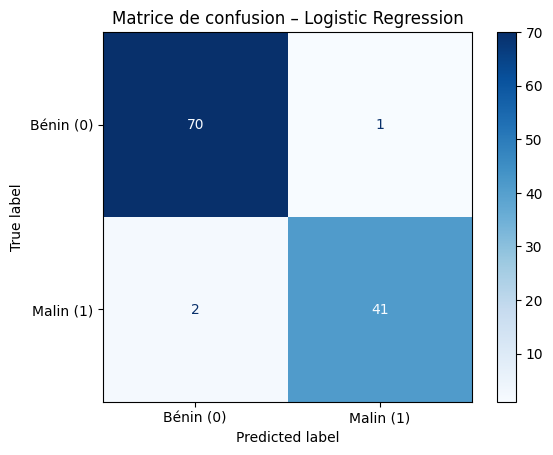

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_pred = lr.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bénin (0)", "Malin (1)"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion – Logistic Regression")
plt.show()


La matrice de confusion est excellente

### Interprétation :

* **70 vrais bénins (0)** bien prédits
* **41 vrais malins (1)** bien prédits
* **1 faux positif** : bénin → prédit comme malin
* **2 faux négatifs** : malin → prédit comme bénin ⚠️ (les plus critiques en médecine)

### Résultat :

* Précision globale : **97.36 %**
* Très bon équilibre entre sensibilité et spécificité.



Sauvegarder le modèle avec joblib

In [11]:
import joblib

# Sauvegarde du modèle
joblib.dump(lr, "best_model_logistic_regression.pkl")
print("Modèle sauvegardé sous best_model_logistic_regression.pkl")


Modèle sauvegardé sous best_model_logistic_regression.pkl


Charger et utiliser le modèle plus tard

In [12]:
# Chargement du modèle
model_loaded = joblib.load("best_model_logistic_regression.pkl")

# Prédiction exemple (sur le premier test)
sample = X_test[0].reshape(1, -1)
print("Prédiction :", model_loaded.predict(sample))


Prédiction : [0]


### **Bilan rapide – Exercice Breast Cancer Prediction**

| Étape                               | Statut |
| ----------------------------------- | ------ |
| Chargement et affichage des données | ✅ Fait |
| Nettoyage (colonnes inutiles)       | ✅ Fait |
| Analyse : countplot + valeurs       | ✅ Fait |
| Mapping `diagnosis` en numérique    | ✅ Fait |
| Normalisation des features          | ✅ Fait |
| Split train/test                    | ✅ Fait |
| Modèles entraînés (4 demandés)      | ✅ Fait |
| Précisions affichées                | ✅ Fait |
| Meilleur modèle identifié           | ✅ Fait |
| Matrice de confusion                | ✅ Fait |

### **Modèle gagnant :** `Logistic Regression` avec **97.36 % de précision**

